# Exploration with ARMA Models

just trying out a few things


In [6]:
!pip install sklearn
!pip install pandas
!pip install statsmodels

  Using cached https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/a0/c5/d2238762d780dde84a20b8c761f563fe882b88c5a5fb03c056547c442a19/scikit_learn-0.21.3-cp36-cp36m-manylinux1_x86_64.whl
     |████████████████████████████████| 286kB 247kB/s eta 0:00:01
     |████████████████████████████████| 25.2MB 19kB/s eta 0:00:017
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 10.5MB 329kB/s eta 0:00:01
     |████████████████████████████████| 512kB 168kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 8.1MB 58kB/s eta 0:00:014
     |████████████████████████████████| 235kB 27kB/s eta 0:00:01
You

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
x_train = pd.read_csv('../data/dengue_features_train.csv')
x_train.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [9]:
y_train = pd.read_csv('../data/dengue_labels_train.csv')
y_train.head(10)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


## Split the training data into train/validation

In [10]:
import math

train_split_size = 0.8

x_train_sj = x_train[x_train.city == 'sj']
y_train_sj = y_train[y_train.city == 'sj']

train_size = int(math.ceil(len(x_train_sj)*train_split_size))
val_size = int(math.floor((len(x_train_sj)*(1-train_split_size))))
assert train_size+val_size == len(x_train_sj)

x_train_sj = x_train[x_train.city == 'sj'][0:train_size]
x_val_sj = x_train[x_train.city == 'sj'][train_size:train_size+val_size]

y_train_sj = y_train[y_train.city == 'sj'][0:train_size]
y_val_sj = y_train[y_train.city == 'sj'][train_size:train_size+val_size]

In [11]:
y_val_sj.head(10)

,city,year,weekofyear,total_cases
749,sj,2004,39,27
750,sj,2004,40,13
751,sj,2004,41,18
752,sj,2004,42,16
753,sj,2004,43,16
754,sj,2004,44,20
755,sj,2004,45,17
756,sj,2004,46,4
757,sj,2004,47,15
758,sj,2004,48,8


In [12]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(y_train_sj.total_cases, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.total_cases   No. Observations:                  748
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3028.887
Method:                       css-mle   S.D. of innovations             13.879
Date:                Tue, 27 Aug 2019   AIC                           6065.773
Time:                        18:30:21   BIC                           6084.243
Sample:                             1   HQIC                          6072.891
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0133      0.719      0.018      0.985      -1.397       1.423
ar.L1.D.total_cases     0.6496      0.171      3.790      0.000       0.314       0.986
ma.L1.D.total_ca

0.18966945631686194
27


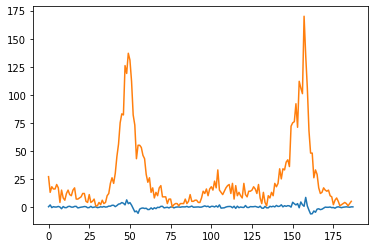

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = y_train_sj.total_cases
size = len(X)
history = [x for x in X]

X2 =  y_val_sj.total_cases
test = [x2 for x2 in X2]


predictions = list()
a = model_fit.predict(start=train_size, end=train_size+val_size)
# a = model_fit.forecast()
print(a[0])
print(test[0])
plt.plot(a)
plt.plot(test)

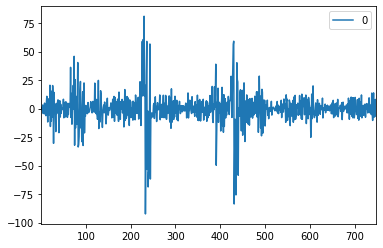

In [13]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

In [14]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

X = y_train_sj.total_cases
size = len(X)
history = [x for x in X]

X2 =  y_val_sj.total_cases
test = [x2 for x2 in X2]


predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('%d: predicted=%f, expected=%f' % (t, yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

0: predicted=13.280104, expected=27.000000
1: predicted=29.226067, expected=13.000000
2: predicted=12.072131, expected=18.000000
3: predicted=18.266554, expected=16.000000
4: predicted=15.850559, expected=16.000000
5: predicted=15.929203, expected=20.000000
6: predicted=20.553495, expected=17.000000
7: predicted=16.852496, expected=4.000000
8: predicted=2.029560, expected=15.000000
9: predicted=15.588639, expected=8.000000
10: predicted=7.295934, expected=6.000000
11: predicted=5.348511, expected=12.000000
12: predicted=12.529158, expected=15.000000
13: predicted=15.710880, expected=11.000000
14: predicted=10.795907, expected=10.000000
15: predicted=9.753345, expected=15.000000
16: predicted=15.595517, expected=17.000000
17: predicted=17.601601, expected=7.000000
18: predicted=5.877738, expected=7.000000
19: predicted=6.420309, expected=8.000000
20: predicted=7.844887, expected=9.000000
21: predicted=9.065410, expected=12.000000
22: predicted=12.467922, expected=12.000000
23: predicted

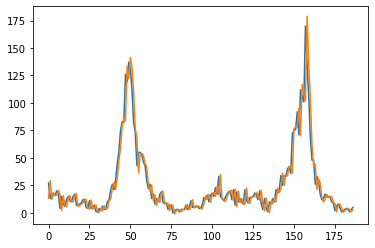

In [15]:
plt.plot(test)
plt.plot(predictions)
plt.show()